# 使用K-Means完成图像压缩

(516, 819, 3)

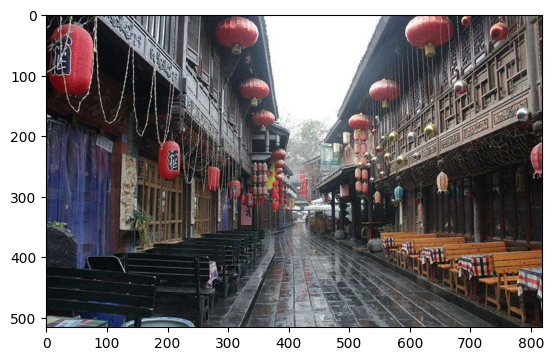

In [2]:
# 读取图片
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline

chengdu = mpimg.imread('challenge-7-chengdu.png') # 将图片加载为 ndarray 数组
plt.imshow(chengdu) # 将数组还原成图像
chengdu.shape

In [ ]:
# Exercise 25.1
# 数据格式转换
data = chengdu.reshape(-1, 3)
data.shape, data[10]

((422604, 3), array([0.12941177, 0.13333334, 0.14901961], dtype=float32))

In [4]:
# Exercise 25.2
# 计算 422604 个像素点中种类的个数，RGB相同的点作为一个种类
"""计算像素点种类个数
"""
def get_variety(data):
    """
    参数:
    预处理后像素点集合

    返回:
    num_variety -- 像素点种类个数
    """

    ### 代码开始 ### (≈ 3 行代码)
    temp=data.tolist()
    num_variety=len(set([tuple(t) for t in temp]))
    ### 代码结束 ###
    
    return num_variety

get_variety(data), data[20]

(100109, array([0.24705882, 0.23529412, 0.2627451 ], dtype=float32))

In [5]:
# Exercise 25.3
# 使用 Mini Batch K-Means 聚类方法对像素点进行聚类
# 并用每一个中心的像素点代替属于该类别的像素点
from sklearn.cluster import MiniBatchKMeans

### 代码开始 ###（≈ 4 行代码）
model = MiniBatchKMeans(10)
model.fit(data)
predict=model.predict(data)
### 代码结束 ###

new_colors = model.cluster_centers_[predict]
# 调用前面实现计算像素点种类的函数，计算像素点更新后种类的个数
get_variety(new_colors)

10

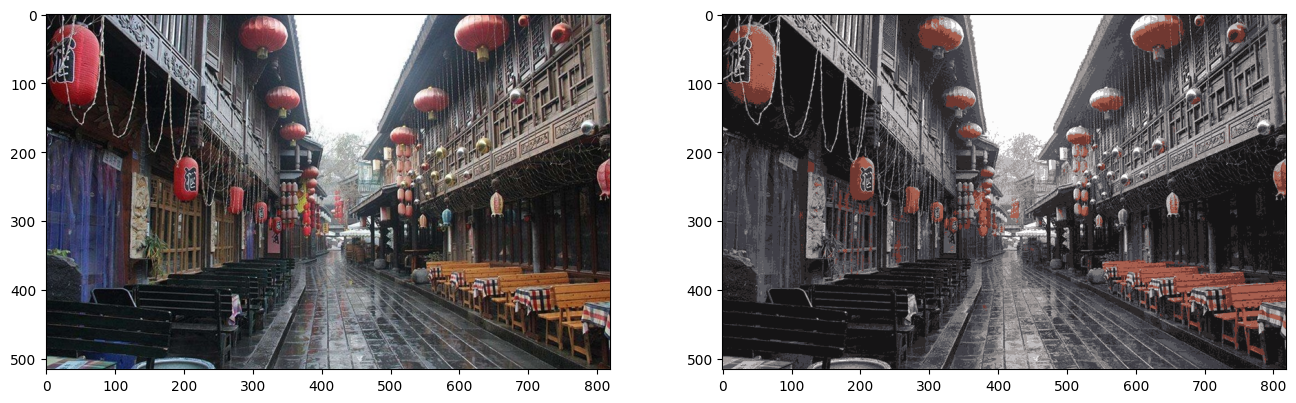

In [6]:
# Exercise 25.4
# 将聚类后并替换为类别中心点值的像素点，变换为数据处理前的格式，并绘制出图片进行对比展示
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

### 代码开始 ### (≈ 3 行代码)
new_chengdu = new_colors.reshape(chengdu.shape)
ax[0].imshow(chengdu)
ax[1].imshow(new_chengdu)
### 代码结束 ###

In [8]:
# 运行对比
mpimg.imsave("new_chengdu.png", new_chengdu)
!du -h new_chengdu.png
!du -h challenge-7-chengdu.png

200K	new_chengdu.png
1.1M	challenge-7-chengdu.png
